In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/dansek-dj/AnalyticsVidya/main/CrossSell/train.csv', index_col = 'id')
test =  pd.read_csv('https://raw.githubusercontent.com/dansek-dj/AnalyticsVidya/main/CrossSell/test.csv', index_col = 'id')
print(train.shape, test.shape)
train['source'] = 'train'
test['source'] = 'test'
train.head()
df = pd.concat([train,test])
df

(381109, 11) (127037, 10)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
id,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN,test
508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN,test
508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN,test


In [6]:
def Datainfo(df):
  print('Null values in each column',df.isnull().sum())
  print('_.'*70, end = '\n\n')
  print('The duplicates in the dataframe is :',df.duplicated().sum())
  print('_.'*70, end = '\n\n')
  print(df.info())
  print('_.'*70, end = '\n\n')
  print('Unique Values in Data', df.nunique())


In [7]:
Datainfo(df)

Null values in each column Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
source                       0
dtype: int64
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

The duplicates in the dataframe is : 306
_._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 1 to 508146
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508146 non-null  obje

<AxesSubplot:xlabel='Age', ylabel='count'>

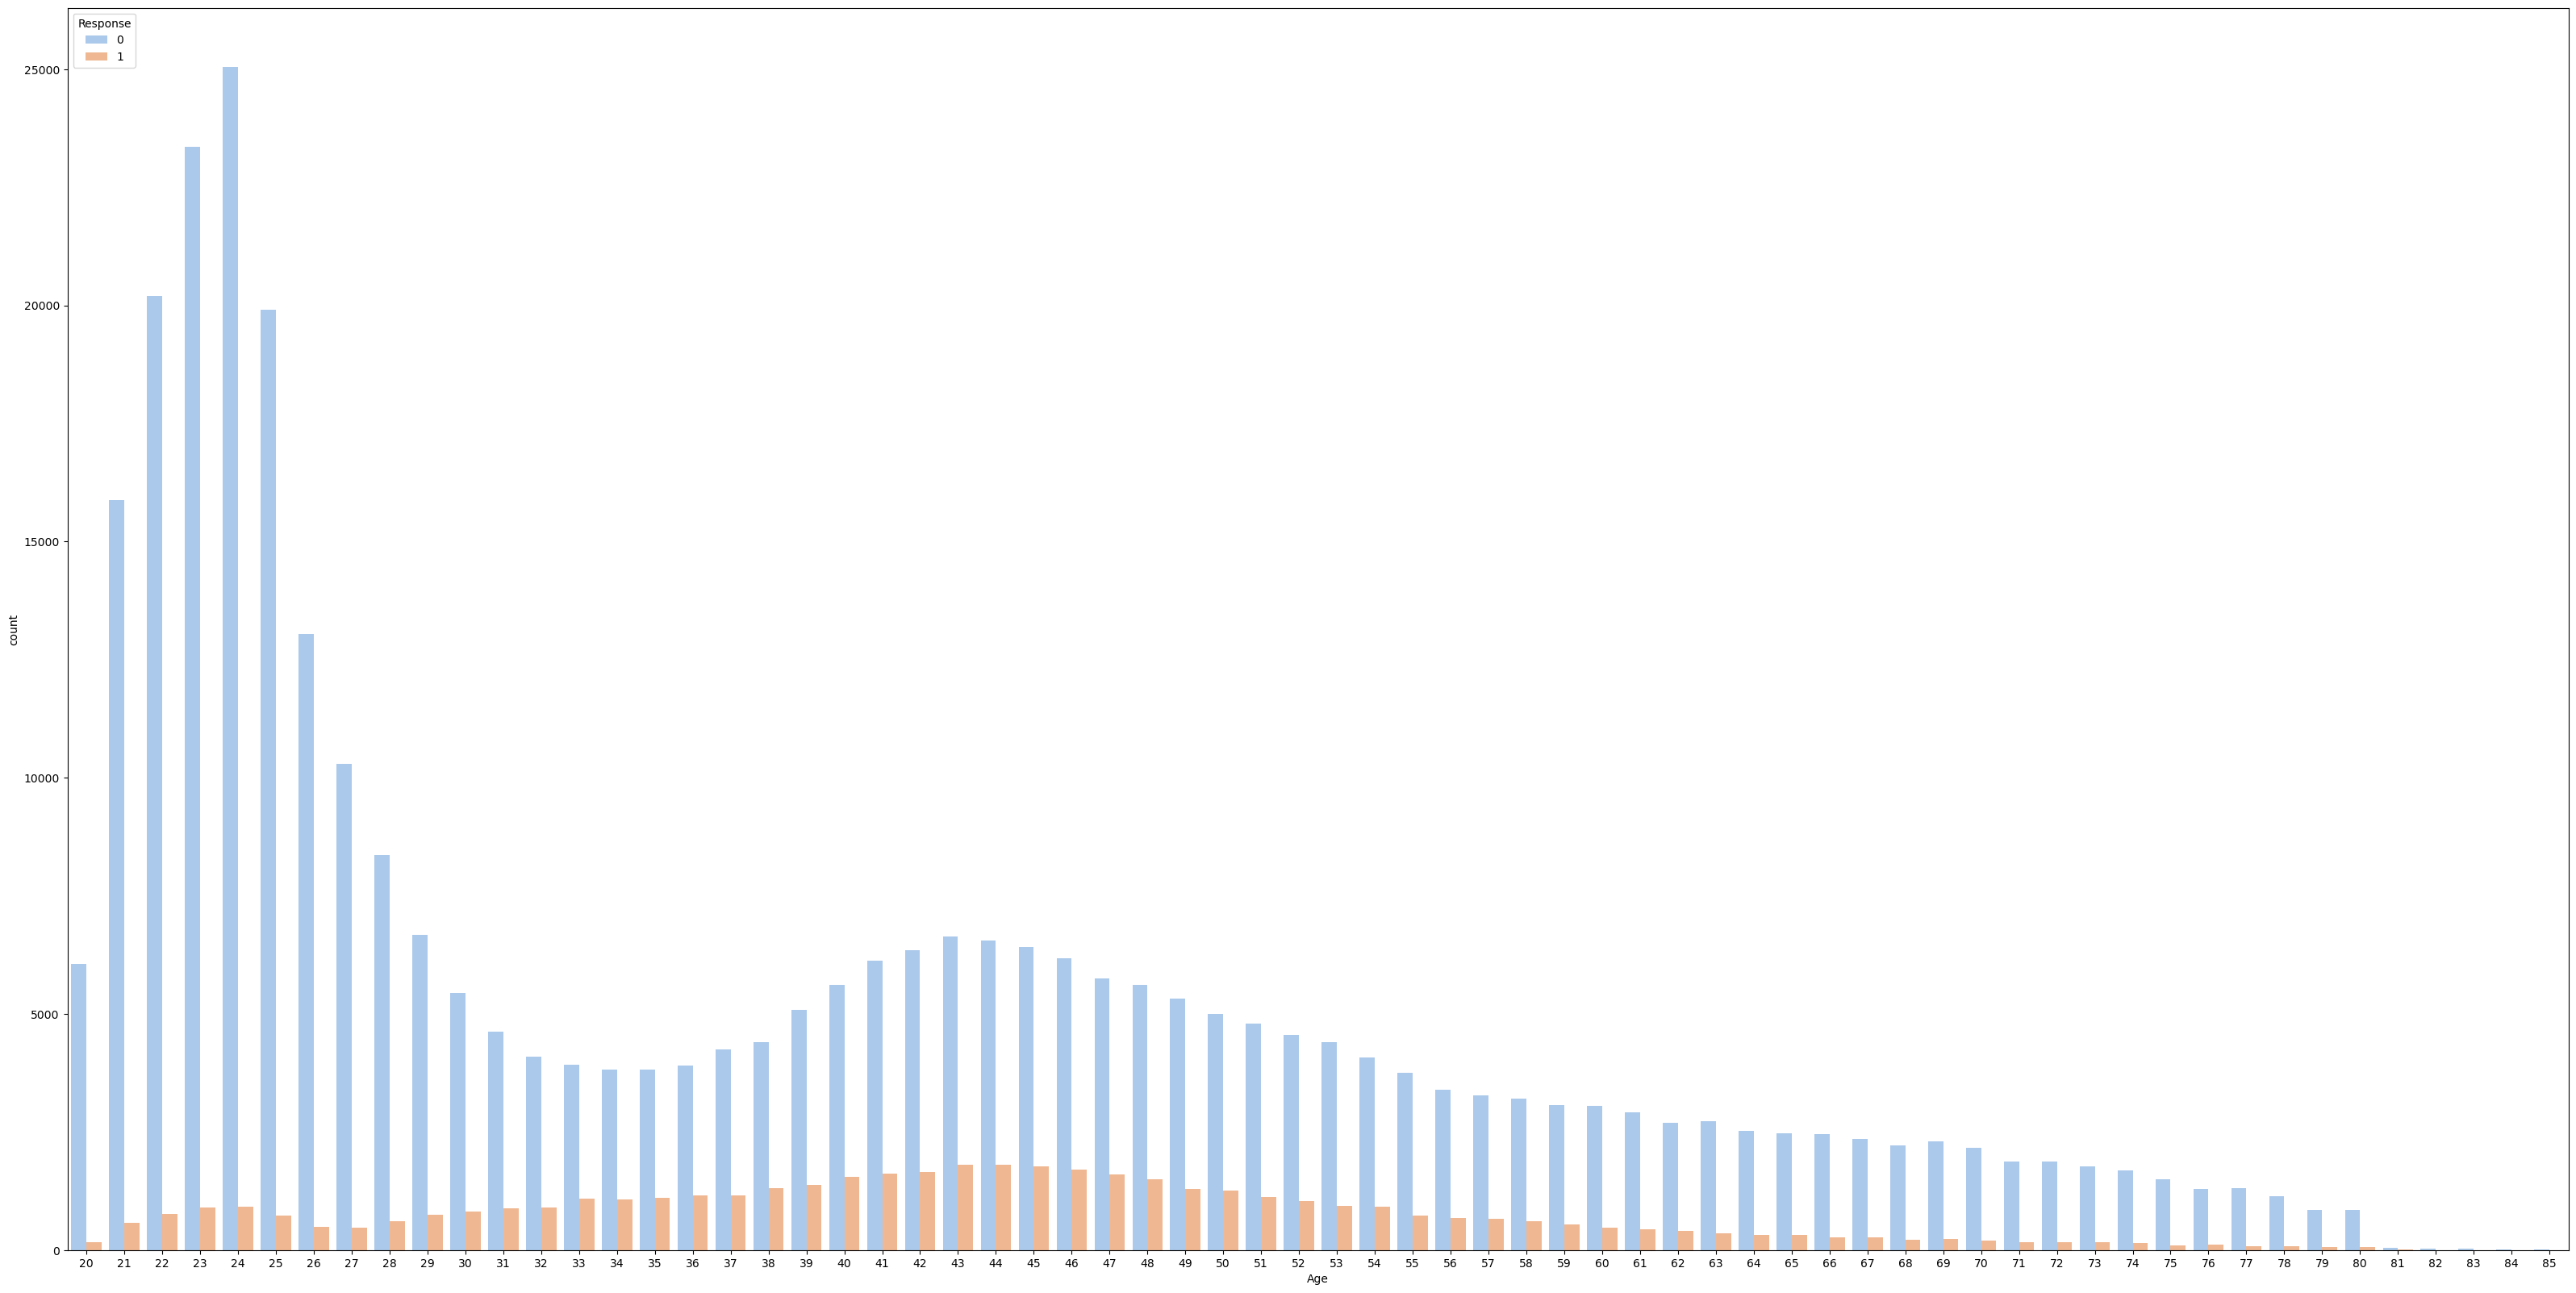

In [8]:
plt.figure(figsize = (40,20))
sns.countplot(x = train.Age, hue =train.Response, palette= 'pastel')

In [ ]:
#sns.pairplot(train, hue = 'Response')

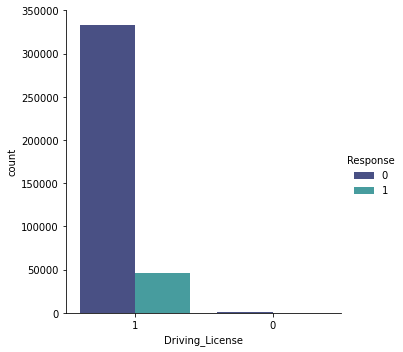

In [ ]:
sns.catplot(data = train, x = 'Driving_License', hue= 'Response', kind = 'count', palette = 'mako', order= [1,0])

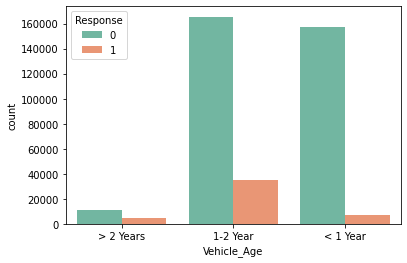

In [ ]:
sns.countplot(data = train, x = 'Vehicle_Age', hue= 'Response', palette = 'Set2')

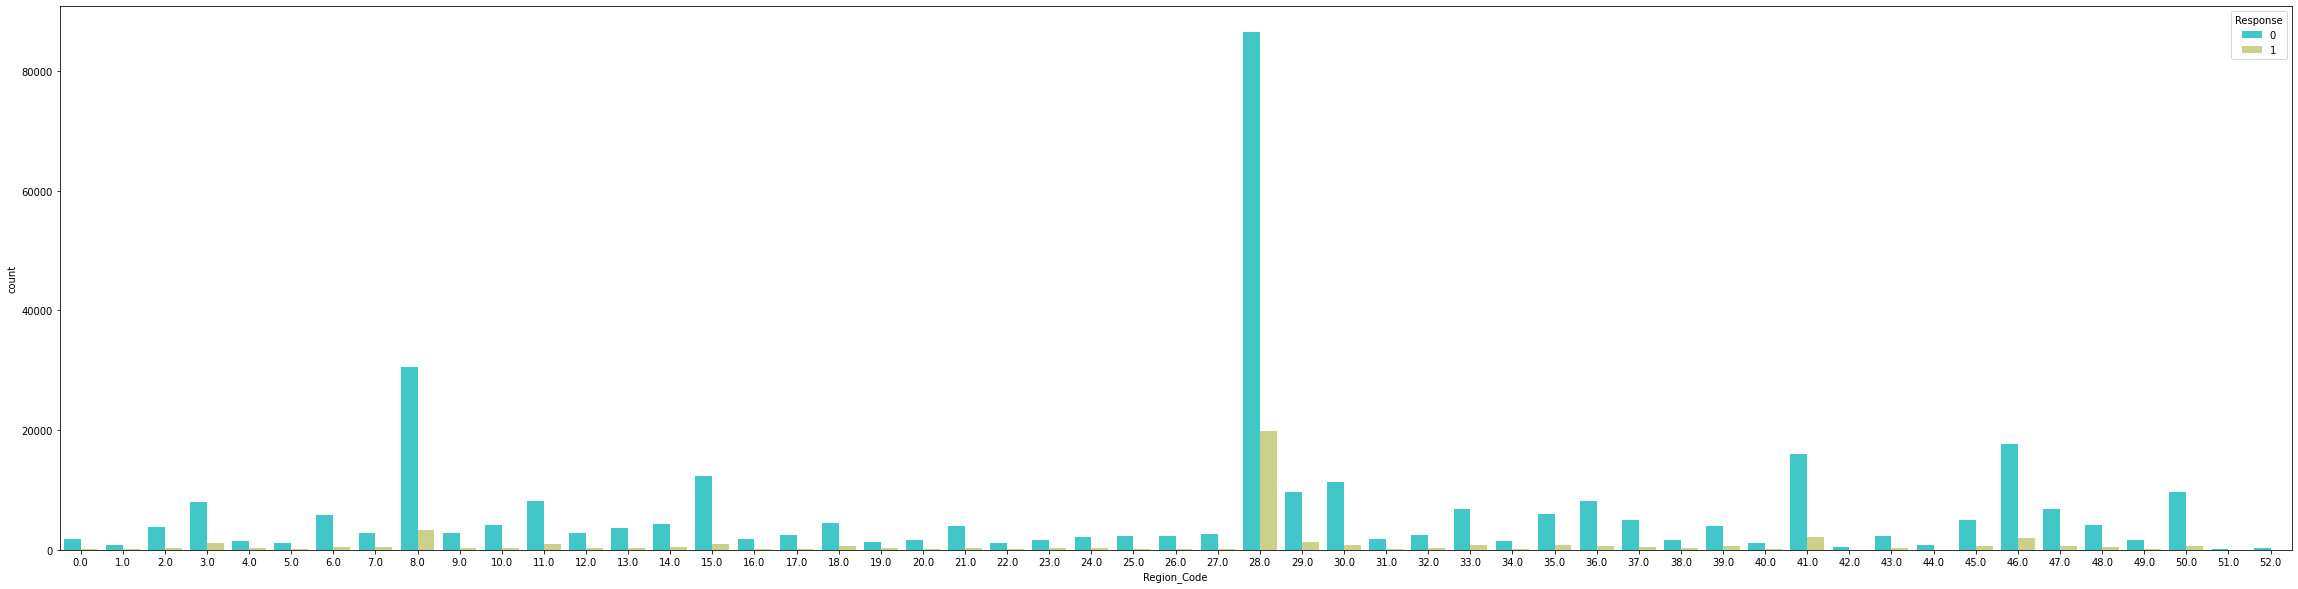

In [ ]:
plt.figure(figsize = (40,10))
sns.countplot(data = train, x = 'Region_Code', hue = 'Response', palette = 'rainbow')

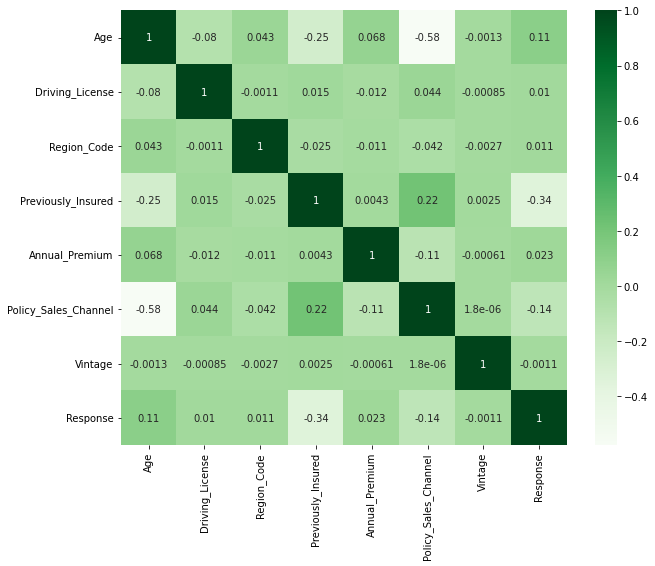

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data = train.corr(), annot = True, cmap = 'Greens')

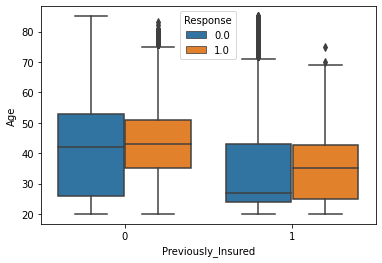

In [ ]:
sns.boxplot(x =df.Previously_Insured, y = df.Age, hue = df.Response)

In [ ]:
cat_col = df.select_dtypes(exclude = np.number)
cat_col

,Gender,Vehicle_Age,Vehicle_Damage,source
id,,,,
1,Male,> 2 Years,Yes,train
2,Male,1-2 Year,No,train
3,Male,> 2 Years,Yes,train
4,Male,< 1 Year,No,train
5,Female,< 1 Year,No,train
...,...,...,...,...
508142,Female,< 1 Year,No,test
508143,Female,1-2 Year,Yes,test
508144,Male,< 1 Year,No,test


In [ ]:
for column in cat_col.columns:
    print(df[column].value_counts())

Male      274325
Female    233821
Name: Gender, dtype: int64
1-2 Year     267015
< 1 Year     219805
> 2 Years     21326
Name: Vehicle_Age, dtype: int64
Yes    256248
No     251898
Name: Vehicle_Damage, dtype: int64
train    381109
test     127037
Name: source, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
enc = ohe.fit_transform(df[['Gender','Region_Code','Policy_Sales_Channel']]).toarray()

In [ ]:
data_en = pd.DataFrame(enc, columns = ohe.get_feature_names_out(['Gender','Region_Code','Policy_Sales_Channel']))

In [ ]:
data_en

,Gender_Female,Gender_Male,Region_Code_0.0,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,Region_Code_4.0,Region_Code_5.0,Region_Code_6.0,Region_Code_7.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1,'No':0})


In [ ]:
df_final = pd.concat([df.reset_index(), data_en.reset_index()], axis = 1)

In [ ]:
df_final.drop(['Gender','Region_Code', 'Policy_Sales_Channel'], axis = 1, inplace = True)

In [ ]:
df_final.shape

(508146, 223)

In [ ]:
trainscale = df_final[df_final['source'] == 'train'].drop('source', axis = 1)
testscale = df_final[df_final['source'] == 'test'].drop('source', axis = 1)

In [ ]:
cat_features = ['Driving_License','Region_Code','Previously_Insured',
                'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel','Vintage','Female','Male']

In [ ]:
pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTEN
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(trainscale.drop('Response', axis = 1), trainscale['Response'], random_state=42)
sampler = SMOTEN(random_state=1)

In [ ]:
#sampler.fit_resample(X_train, y_train)

In [ ]:
pipeline = make_pipeline(RobustScaler(),CatBoostClassifier(iterations = 1000, 
                        learning_rate=0.02,
                        depth=8,
                        loss_function='Logloss',
                        eval_metric='Logloss',
                        leaf_estimation_method='Newton',
                        random_state = 1,
                        subsample = 0.9,
                        rsm = 0.8))

In [ ]:
model = make_pipeline(RobustScaler(), LogisticRegression())

In [ ]:
from tqdm import tqdm
pipeline.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
def Results(clf, X_train, y_train):
  clf.fit(X_train, y_train)
  ypred = clf.predict(X_train)
  print('The accuracy score for train:', accuracy_score(y_train, ypred))
  print(classification_report(y_train, ypred))
  ytest_pred = clf.predict(X_test)
  print('The accuracy score for test:', accuracy_score(y_test, ytest_pred))
  print(classification_report(y_test,ytest_pred))
  y_score = clf.decision_function(X_test)
  print('ROC_AUC score',roc_auc_score(y_test, y_score))
  fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label="data 1, auc="+str(auc))
  plt.legend(loc=4)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score for train: 0.8776269893748404
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93    250886
         1.0       0.35      0.00      0.00     34945

    accuracy                           0.88    285831
   macro avg       0.61      0.50      0.47    285831
weighted avg       0.81      0.88      0.82    285831

The accuracy score for test: 0.8764772560297236
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     83513
         1.0       0.42      0.00      0.00     11765

    accuracy                           0.88     95278
   macro avg       0.65      0.50      0.47     95278
weighted avg       0.82      0.88      0.82     95278

ROC_AUC score 0.8520791465143862


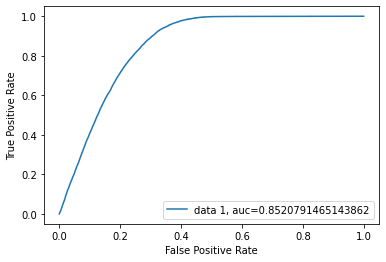

In [ ]:
Results(model,X_train, y_train)

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
bst = make_pipeline(RobustScaler() ,XGBClassifier(n_estimators=10, max_depth=2, learning_rate=1, objective='binary:logistic'))

In [ ]:
Results(bst, X_train, y_train)

The accuracy score for train: 0.877728447929021
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93    250886
         1.0       0.47      0.00      0.00     34945

    accuracy                           0.88    285831
   macro avg       0.67      0.50      0.47    285831
weighted avg       0.83      0.88      0.82    285831

The accuracy score for test: 0.8764037868133252
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     83513
         1.0       0.26      0.00      0.00     11765

    accuracy                           0.88     95278
   macro avg       0.57      0.50      0.47     95278
weighted avg       0.80      0.88      0.82     95278



AttributeError: ignored